# The facility of loading MNIST dataset

In [6]:
import numpy as np
import pandas as pd
import os
import sys

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# width and length
N_IMAGE_SIZE = 28
N_LABELS = 10
N_IMAGE_PIXELS = N_IMAGE_SIZE * N_IMAGE_SIZE

In [71]:
def mnist_dataset_load(dataset_path, n = 0):

    print("Loading training and testing dataset ...")


    walk = os.walk(dataset_path)  

    data = None

    i = 0

    for path,dir_list,file_list in walk:  

        for filename in file_list:  
        
            fullpath = os.path.join(path, filename) 

            if filename.endswith(".txt"):

                print(f"Loading {filename}")

                ds = np.loadtxt(fullpath, delimiter=",")

                if data is None:
                    data = ds
                else:
                    data = np.concatenate([data, ds])

                if i > n and n > 0:
                    return

                i += 1


    print(f"Total {len(data)} data are loaded")

    indices = np.arange(len(data))

    np.random.shuffle(indices)

    N_TRAIN_DATA = 3000
    N_TEST_DATA = 100

    train_indices = np.random.choice(indices, N_TRAIN_DATA)
    test_indices = np.random.choice(indices, N_TEST_DATA)

    train_data = data[train_indices]
    test_data = data[test_indices]

    print("train_data length: ", len(train_data))
    print("test_data length: ", len(test_data))

    #train_data = np.loadtxt(dataset_path + "mnist_train.csv", delimiter=",")
    #test_data = np.loadtxt(dataset_path + "mnist_test.csv", delimiter=",") 

    print("Training and testing datasets are loaded.")


    scale = 1 / 255

    X_train = np.asfarray(train_data[:, 1:]) * scale #+ 0.01
    X_test = np.asfarray(test_data[:, 1:]) * scale #+ 0.01

    y_train = np.array(train_data[:, :1], dtype = np.int)
    y_test = np.array(test_data[:, :1], dtype = np.int)

    y_train = y_train.flatten()
    y_test = y_test.flatten()

    print("X_train.shape=", X_train.shape)
    print("X_test.shape=", X_test.shape)

    print("y_train.shape=", y_train.shape)
    print("y_test.shape=", y_test.shape)

    #print(y_train)
    #exit()

    return X_train, y_train, X_test, y_test


In [72]:
X_train, y_train, X_test, y_test = mnist_dataset_load("mnist_data")

Loading training and testing dataset ...
Loading mnist_data_19.txt
Loading mnist_data_25.txt
Loading mnist_data_31.txt
Loading mnist_data_30.txt
Loading mnist_data_24.txt
Loading mnist_data_18.txt
Loading mnist_data_32.txt
Loading mnist_data_26.txt
Loading mnist_data_27.txt
Loading mnist_data_33.txt
Loading mnist_data_37.txt
Loading mnist_data_23.txt
Loading mnist_data_22.txt
Loading mnist_data_36.txt
Loading mnist_data_20.txt
Loading mnist_data_34.txt
Loading mnist_data_35.txt
Loading mnist_data_21.txt
Loading mnist_data_85.txt
Loading mnist_data_91.txt
Loading mnist_data_1.txt
Loading mnist_data_46.txt
Loading mnist_data_52.txt
Loading mnist_data_53.txt
Loading mnist_data_47.txt
Loading mnist_data_90.txt
Loading mnist_data_0.txt
Loading mnist_data_84.txt
Loading mnist_data_2.txt
Loading mnist_data_92.txt
Loading mnist_data_86.txt
Loading mnist_data_79.txt
Loading mnist_data_51.txt
Loading mnist_data_45.txt
Loading mnist_data_44.txt
Loading mnist_data_50.txt
Loading mnist_data_78.txt


# Plotting images

In [75]:
def plot_mnist(
    X,
    y,
    nrows = 4,
    ncols = 4,
    subfig_width = 2,
    subfig_height = 2):
    
    
    indices = list(range(len(X)))
    
    indices_ = np.random.choice(indices, nrows * ncols)
    
    X_ = X[indices]
    y_ = y[indices]
    
    figsize = (ncols * subfig_width, nrows * subfig_height)

    fig, axes = plt.subplots(nrows = nrows,
                         ncols = ncols,
                         figsize = figsize)

    axes_flat = axes.flat 

    for row in range(nrows):
        for col in range(ncols): 
            idx = row * ncols + col
                
        
            ax = axes_flat[idx]
        
            ax.set_xticks([])
            ax.set_yticks([])
        
            image_ = X_[idx].reshape(N_IMAGE_SIZE, N_IMAGE_SIZE)
            label = y_[idx]
            
            ax.imshow(image_, cmap = "gray", vmin = 0, vmax = 1) 
                
            ax.title.set_text(f"{label}")
  
    plt.show()

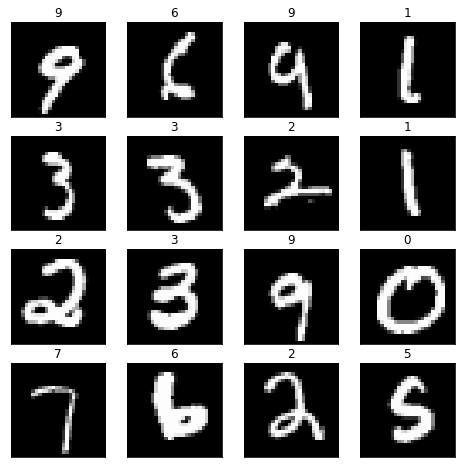

In [76]:
plot_mnist(X_train, y_train)

# kNN

In [80]:
class MyKNN:
    def __init__(self, k = 3):
        self.X_train = None
        self.y_train = None
        self.k = 3
        
    def fit(self, X_train, y_train):
        self.X_train = X_train.copy()
        self.y_train = y_train.copy()
    
    
    def predict_one(self, x):
        # Computing the distances with respect to 
        # all X-s in X_train
        # The x and X_train are all column vectors
        distances = np.sum((x - self.X_train)**2, axis = 1).flatten()
    
        k = min(self.k, len(distances))
    
        #sorting the indices of the distance by ascending
        indices_topk = np.argsort(distances)[0:k]
    
        #choosing topk labels
        y_topk = self.y_train[indices_topk]
        
        #voting
        labels, counts = np.unique(y_topk, return_counts = True)
        
        idx = np.argmax(counts)
        
        y_pred = labels[idx]
                
        return y_pred
        
    def predict(self, X_test):
        
        y_pred = np.array([self.predict_one(xi) for xi in X_test])
        
        return y_pred

In [81]:
knn = MyKNN()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [82]:
def prediction_accuracy(y_predicted, y_truth):
    return np.mean(y_predicted == y_truth)

In [83]:
accuracy = prediction_accuracy(y_pred, y_test)

print("Testing accuracy: ", accuracy)

Testing accuracy:  0.93
